# End-to-End framework: from original DF to DF with embs and labels

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
plt.rcParams["figure.figsize"] = [20,10]
from NetEmbs.DataProcessing.connect_db import *
d = upload_data("Simulation/FSN_Data.db", limit=3000)
d.head(4)

,ID,Name,FA_Name,Value
2,2,Revenue_5,Revenue,-788.000000
3,2,Tax_5,Tax,-47.132907
4,2,ixsros_5,ixsros,0.003332
5,2,jlgnur_5,jlgnur,1.406287


In [4]:
from NetEmbs.DataProcessing import *
journal_entries = None
if journal_entries is None:
    d = prepare_data(d)
else:
    YOUR_DATAFRAME = pd.DataFrame.from_dict(journal_entries)
    YOUR_DATAFRAME.columns = ['ID', 'FA_Name', 'Debit', 'Credit']
    d = prepare_data(YOUR_DATAFRAME, split=False)
d.head(4)

,ID,Signature,FA_Name,Debit,Credit,from
0,2,"([('Revenue', 0.94356), ('Tax', 0.05644)], [('...",Revenue,0.000000,0.943562,True
1,2,"([('Revenue', 0.94356), ('Tax', 0.05644)], [('...",Tax,0.000000,0.056438,True
2,2,"([('Revenue', 0.94356), ('Tax', 0.05644)], [('...",TradeReceivables,0.990561,0.000000,False
3,2,"([('Revenue', 0.94356), ('Tax', 0.05644)], [('...",aofere,0.001368,0.000000,False


In [ ]:
from NetEmbs.Vis.plots import plotFSN
plotFSN(d, edge_labels=False, node_labels=False)

## TensorFlow

In [ ]:
from NetEmbs.SkipGram import *

In [ ]:
res = add_ground_truth(get_embs_TF(d, embed_size=6, num_steps=50000, walk_length=20,
                walks_per_node=100), "Simulation/FSN_Data.db")

In [ ]:
import seaborn as sns
for name, group in res.groupby("FA_Name"):
    print(name)
    if group.shape[0] > 3:
        sns.heatmap(list(group["Emb"].values), vmin=-1.0, vmax=1.0, cmap=sns.color_palette("RdBu_r", 16))
        plt.show()
    else:
        print("Not enough samples...")

In [ ]:
from NetEmbs.Vis import *
set_font()
plot_tSNE(res, title="Good_tSNE")

In [5]:
res = pd.read_pickle("tmp_embs.pkl")

In [6]:
res.head(4)

,ID,Emb,FA_Name
0,2,"[-0.51590633, 0.44843608, -0.6765839, 0.172856...",Sales 6 btw
1,3,"[-0.09579003, 0.25433877, 0.6123743, 0.5961645...",Cost of Sales
2,4,"[-0.6812292, -0.38854262, 0.38754085, -0.32557...",Fixed Assets
3,5,"[-0.28037363, -0.023306053, -0.6254437, -0.546...",Sales 6 btw


## KMeans vs. Ground truth

First row of Data: 
 [-0.51590633  0.44843608 -0.67658389  0.17285612 -0.11130223  0.18086587]


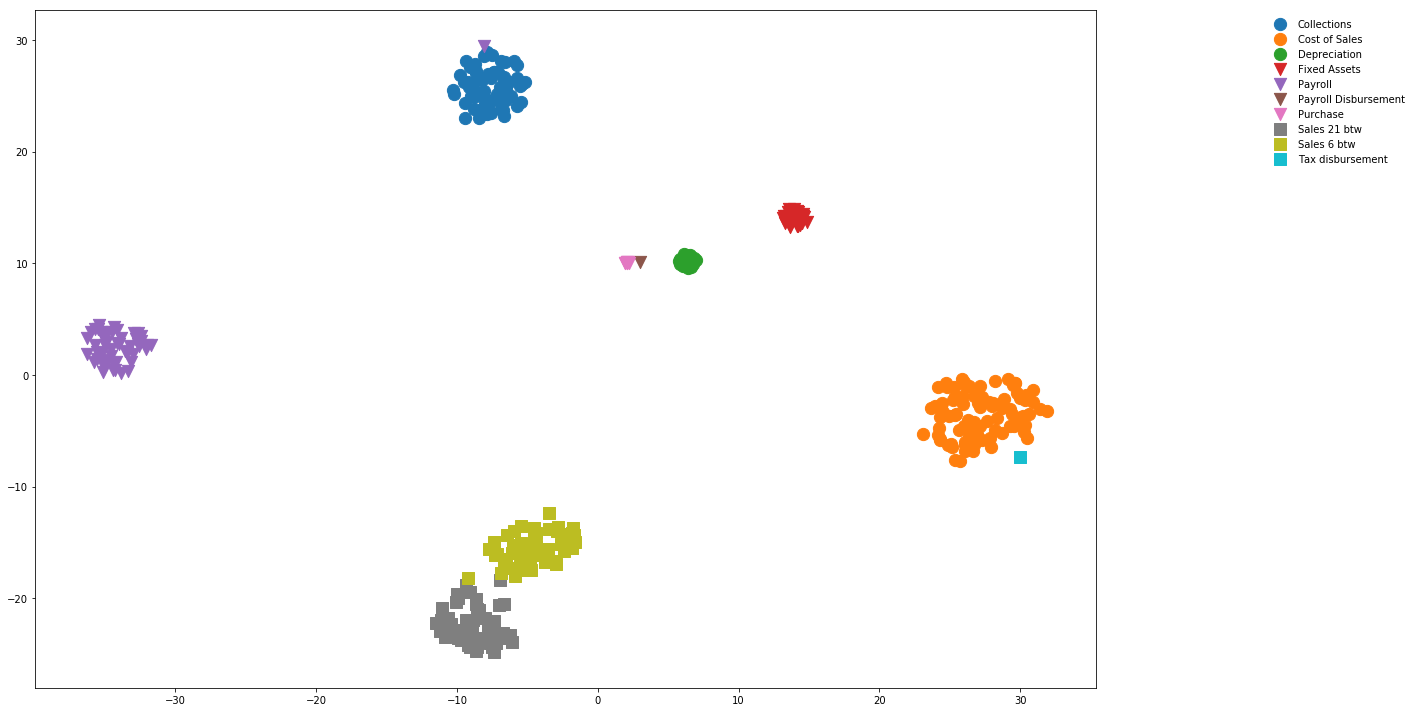

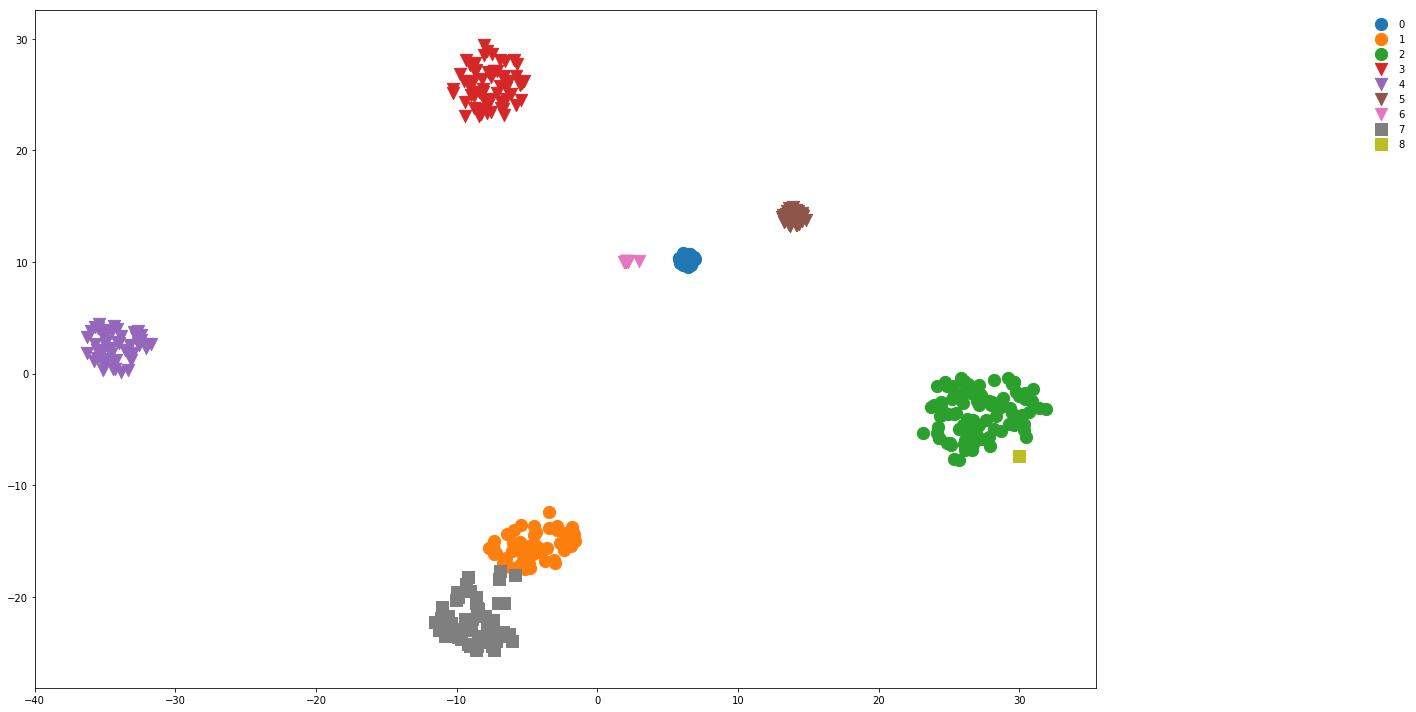

In [12]:
from NetEmbs.Clustering import *
cl_labs = cl_KMeans(res, 9)
from NetEmbs.Vis.plots import plot_tSNE
plot_tSNE(cl_labs)
plot_tSNE(cl_labs, legend_title="label")

## Agglomerative vs. Ground truth

First row of Data: 
 [-0.51590633  0.44843608 -0.67658389  0.17285612 -0.11130223  0.18086587]


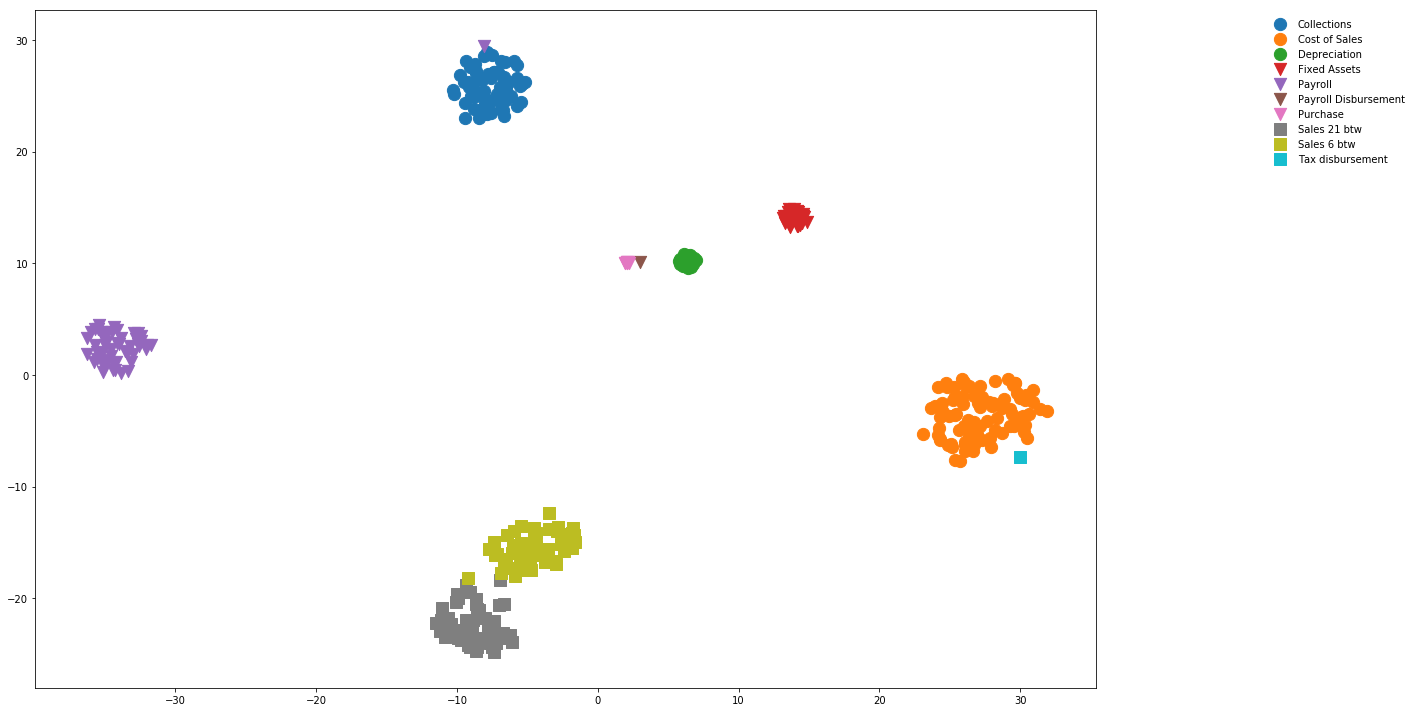

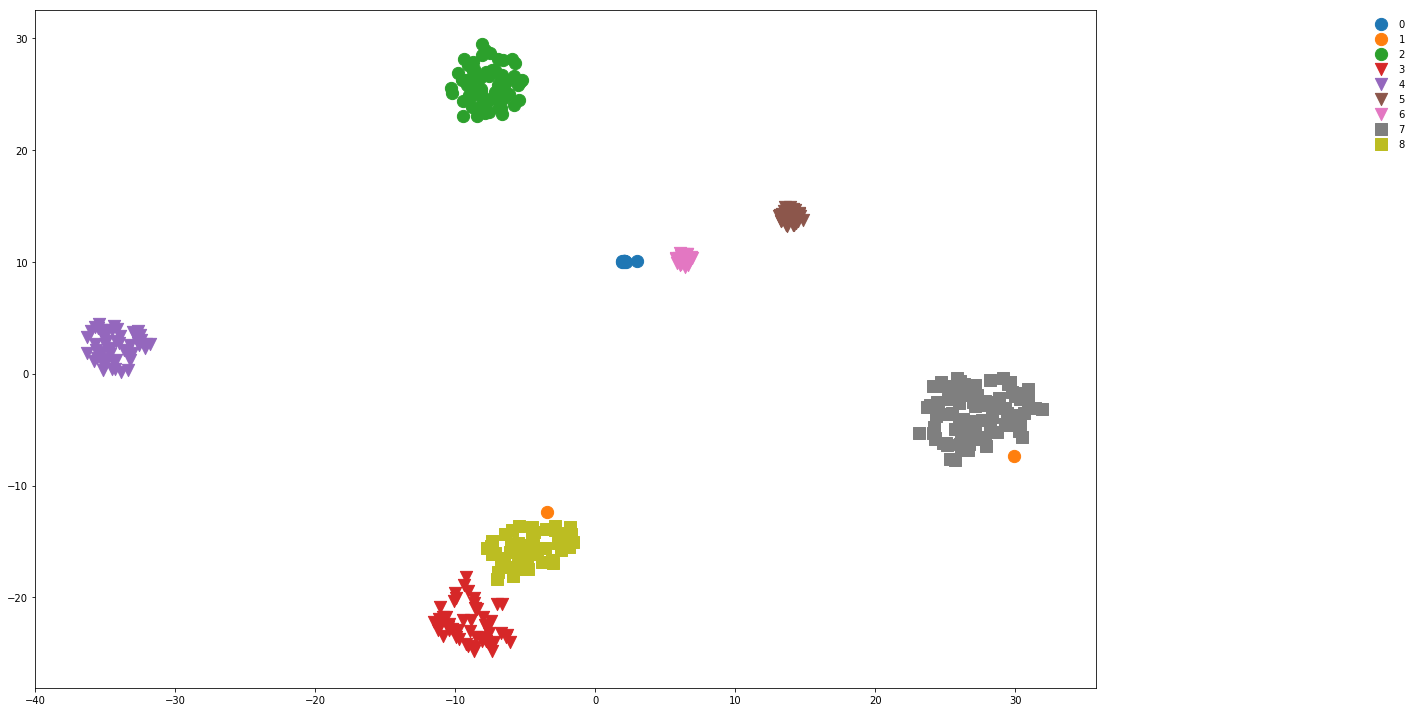

In [13]:
from NetEmbs.Clustering import *
cl_labs = cl_Agglomerative(res, 9)
from NetEmbs.Vis.plots import plot_tSNE
plot_tSNE(cl_labs)
plot_tSNE(cl_labs, legend_title="label")